# Task 3: Customer Segmentation / Clustering 
### Perform customer segmentation using clustering techniques. Use both profile information 
### (from Customers.csv) and transaction information (from Transactions.csv). 
#### ● You have the flexibility to choose any clustering algorithm and any number of clusters in 
#### between(2 and 10)  
#### ● Calculate clustering metrics, including the DB Index(Evaluation will be done on this). 
#### ● Visualise your clusters using relevant plots. 
### Deliverables: 
#### ● A report on your clustering results, including: 
##### ○ The number of clusters formed. 
##### ○ DB Index value. 
##### ○ Other relevant clustering metrics. 
#### ● A Jupyter Notebook/Python script containing your clustering code. 
### Evaluation Criteria: 
#### ● Clustering logic and metrics. 
#### ● Visual representation of clusters

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator
from sklearn.metrics import calinski_harabasz_score

# Loading Data

In [2]:
transaction_df=pd.read_csv('transaction_data.csv')

In [3]:
transaction_df.sample(5) #merged customer.csv and product.csv in transaction.csv file

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Category,ProductName,Region,SignupDate
808,T00266,C0125,P099,2024-02-27 18:25:58,2,708.58,354.29,Books,SoundWave Mystery Book,North America,2022-12-18
786,T00935,C0109,P029,2024-09-21 09:44:39,1,433.64,433.64,Electronics,TechPro Headphones,North America,2022-05-09
896,T00736,C0195,P028,2024-03-05 10:46:53,4,942.32,235.58,Home Decor,HomeSense Desk Lamp,South America,2024-09-17
706,T00689,C0024,P090,2024-05-30 00:00:01,2,330.60,165.30,Books,ComfortLiving Biography,North America,2024-02-05
79,T00501,C0158,P023,2024-09-04 16:19:42,3,1363.59,454.53,Home Decor,ActiveWear Cookware Set,South America,2023-04-12


# EDA

In [4]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   Category         1000 non-null   object 
 8   ProductName      1000 non-null   object 
 9   Region           1000 non-null   object 
 10  SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [5]:
transaction_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [6]:
transaction_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'Category', 'ProductName', 'Region',
       'SignupDate'],
      dtype='object')

In [7]:
transaction_df["ProductName"].unique().tolist()

['ComfortLiving Bluetooth Speaker',
 'HomeSense T-Shirt',
 'ActiveWear Smartphone',
 'TechPro Textbook',
 'TechPro Running Shoes',
 'TechPro Rug',
 'ActiveWear Cookware Set',
 'BookWorld Biography',
 'BookWorld Cookware Set',
 'HomeSense Novel',
 'ComfortLiving Smartphone',
 'SoundWave Cookbook',
 'ComfortLiving Smartwatch',
 'SoundWave Mystery Book',
 'TechPro Vase',
 'HomeSense Desk Lamp',
 'ActiveWear Wall Art',
 'ComfortLiving Biography',
 'ComfortLiving Desk Lamp',
 'SoundWave Novel',
 'ComfortLiving Cookware Set',
 'TechPro Novel',
 'BookWorld Running Shoes',
 'ActiveWear Jeans',
 'BookWorld Jacket',
 'BookWorld Smartwatch',
 'ActiveWear Textbook',
 'ActiveWear Smartwatch',
 'ActiveWear Cookbook',
 'SoundWave Headphones',
 'HomeSense Rug',
 'HomeSense Sweater',
 'TechPro Smartwatch',
 'ActiveWear Running Shoes',
 'HomeSense Wall Art',
 'SoundWave Rug',
 'ActiveWear Headphones',
 'SoundWave Jeans',
 'SoundWave Desk Lamp',
 'BookWorld Cookbook',
 'BookWorld Wall Art',
 'TechPro Coo

In [8]:
transaction_df.drop(columns=['ProductName'])

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Category,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Electronics,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Electronics,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Electronics,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Electronics,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Electronics,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Electronics,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Electronics,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Electronics,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Electronics,Asia,2024-11-11


<Axes: ylabel='Density'>

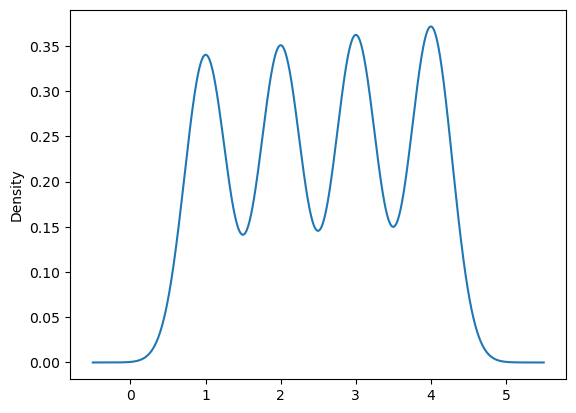

In [9]:
transaction_df["Quantity"].plot.kde()

In [10]:
transaction_df.dtypes


TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
Category            object
ProductName         object
Region              object
SignupDate          object
dtype: object

In [11]:
transaction_df.nunique()

TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
Category              4
ProductName          66
Region                4
SignupDate          178
dtype: int64

# One Hot Encoding for nominal values

In [12]:
encoded_df = pd.get_dummies(transaction_df, columns=["Category", "Region"], drop_first=True)
encoded_df.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,SignupDate,Category_Clothing,Category_Electronics,Category_Home Decor,Region_Europe,Region_North America,Region_South America
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,2022-12-03,False,True,False,True,False,False
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,2024-09-04,False,True,False,False,False,False
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,2024-04-04,False,True,False,True,False,False
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,2024-04-11,False,True,False,False,False,True
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,2022-03-15,False,True,False,True,False,False


In [13]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         1000 non-null   object 
 1   CustomerID            1000 non-null   object 
 2   ProductID             1000 non-null   object 
 3   TransactionDate       1000 non-null   object 
 4   Quantity              1000 non-null   int64  
 5   TotalValue            1000 non-null   float64
 6   Price                 1000 non-null   float64
 7   ProductName           1000 non-null   object 
 8   SignupDate            1000 non-null   object 
 9   Category_Clothing     1000 non-null   bool   
 10  Category_Electronics  1000 non-null   bool   
 11  Category_Home Decor   1000 non-null   bool   
 12  Region_Europe         1000 non-null   bool   
 13  Region_North America  1000 non-null   bool   
 14  Region_South America  1000 non-null   bool   
dtypes: bool(6), float64(2)

# Scaling

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df[["Quantity", "TotalValue", "Price"] + list(encoded_df.columns[11:])])


In [15]:
scaled_data[0]

array([-1.37548802, -0.7898504 ,  0.19994831, -0.57427105,  1.80928281,
       -0.56811207, -0.66089455])

## Training K-Means Clustering Model

In [16]:
kmeans_set = {"init":"k-means++", "n_init":10, "max_iter":300, "random_state":42}
inertias = [] # inertia for k cluster
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

## Elbow Method for finding optimal Value of Clusters

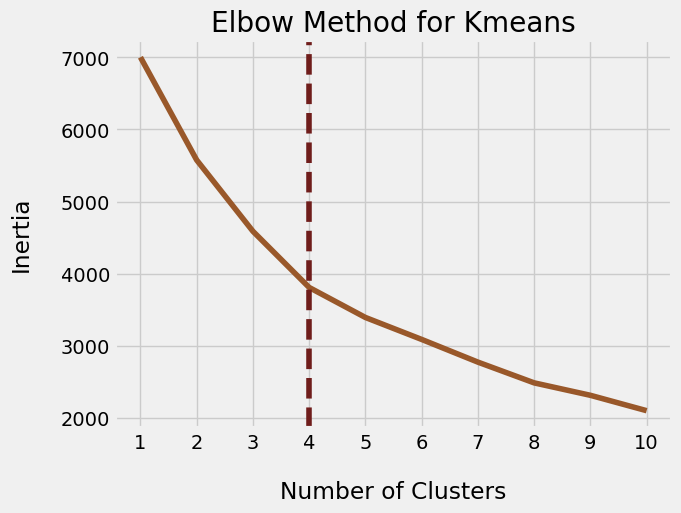

In [17]:
def elbow_optimizer(inertias,i):
    kl = KneeLocator(range(1,11), inertias, curve='convex', direction="decreasing")
    plt.style.use("fivethirtyeight")
    sns.lineplot(x=range(1,11), y=inertias, color='#99582a')
    plt.xticks(range(1,11))
    plt.xlabel("Number of Clusters", labelpad=20)
    plt.ylabel("Inertia", labelpad=20)
    plt.title(f"Elbow Method for {i}", y=1)
    plt.axvline(x=kl.elbow, color='#6f1d1b', label='axvline-fullheight', ls='--')
    plt.show()
elbow_optimizer(inertias, 'Kmeans')

#####  Here kneeLocator gives the optimal value of k =4

# Evaluation Metrics through Silhouette Calinski Harabasz Davies Bouldin Scores 

In [18]:
silhouette = []
calinski_harabasz =[]
davies_bouldin =[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data)
    sil_score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette.append(sil_score)
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data)
    cal_score=calinski_harabasz_score(scaled_data, kmeans.labels_)
    calinski_harabasz.append(cal_score)
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data)
    dav_score=davies_bouldin_score(scaled_data, kmeans.labels_)
    davies_bouldin.append(dav_score)
    
print(f"Length of Silhouette List: {len(silhouette)}")
print(f"Length of Calinski-Harabasz List: {len(calinski_harabasz)}")
print(f"Length of Davies-Bouldin List: {len(davies_bouldin)}")

Length of Silhouette List: 9
Length of Calinski-Harabasz List: 9
Length of Davies-Bouldin List: 9


In [19]:
for k in range(2, 11):
    print(f"Clusters: {k}")
    print(f"Silhouette Score: {silhouette[k-2]}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz[k-2]}")
    print(f"Davies-Bouldin Index: {davies_bouldin[k-2]}")
    print("-" * 30)

Clusters: 2
Silhouette Score: 0.19425679797236556
Calinski-Harabasz Score: 254.94942265955044
Davies-Bouldin Index: 1.8911469337293945
------------------------------
Clusters: 3
Silhouette Score: 0.2796641782512556
Calinski-Harabasz Score: 261.9422993448456
Davies-Bouldin Index: 1.551790632606875
------------------------------
Clusters: 4
Silhouette Score: 0.2682631228175757
Calinski-Harabasz Score: 277.8726185450916
Davies-Bouldin Index: 1.420816441648777
------------------------------
Clusters: 5
Silhouette Score: 0.2709113897521873
Calinski-Harabasz Score: 264.1231759798257
Davies-Bouldin Index: 1.3383959306293445
------------------------------
Clusters: 6
Silhouette Score: 0.2559554590520348
Calinski-Harabasz Score: 251.43038909359421
Davies-Bouldin Index: 1.242717488362681
------------------------------
Clusters: 7
Silhouette Score: 0.278660249219073
Calinski-Harabasz Score: 251.75357811517796
Davies-Bouldin Index: 1.2170529106387602
------------------------------
Clusters: 8
Silh

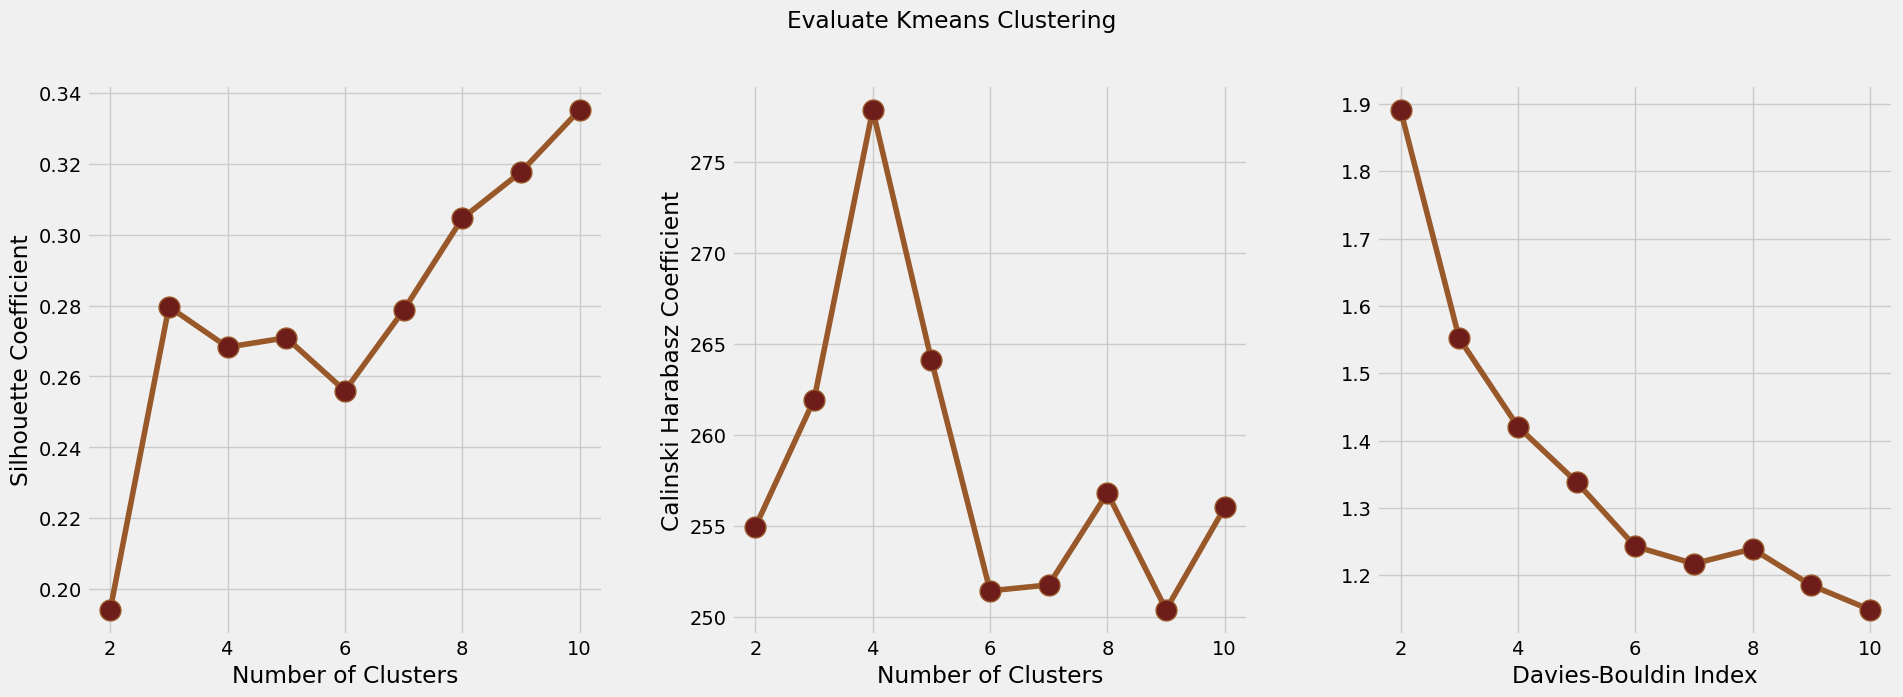

In [20]:
def plot_evaluation(sil, cal, dav, name, x=range(2,11)):
    fig, ax = plt.subplots(1,3, figsize=(20,8), dpi=100)
    ax[0].plot(x, sil, color='#99582a', marker='o', ms=15, mfc='#6f1d1b')
    ax[1].plot(x, cal, color='#99582a', marker='o', ms=15, mfc='#6f1d1b')
    ax[2].plot(x, dav, color='#99582a', marker='o', ms=15, mfc='#6f1d1b')
    ax[0].set_xlabel("Number of Clusters")
    ax[0].set_ylabel("Silhouette Coefficient")
    ax[1].set_xlabel("Number of Clusters")
    ax[1].set_ylabel("Calinski Harabasz Coefficient")
    ax[2].set_xlabel("Number of Clusters")
    ax[2].set_xlabel("Davies-Bouldin Index")   
    plt.suptitle(f'Evaluate {name} Clustering',y=0.92)
    plt.tight_layout(pad=3)
    plt.show()
# checking the correctness of the elbow method's result 
plot_evaluation(silhouette, calinski_harabasz, davies_bouldin, 'Kmeans')

#### Here the optimum score comes from cluster 4 i.e Clusters: 4
#### Silhouette Score: 0.2682631228175757
#### Calinski-Harabasz Score: 277.8726185450916
#### Davies-Bouldin Index: 1.420816441648777

# Dimentionslity Reduction through PCA for better Performance

In [21]:
from sklearn.decomposition import PCA

In [44]:
# 1. Dimensionality Reduction using PCA (if applicable)
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
scaled_data_pca = pca.fit_transform(scaled_data)

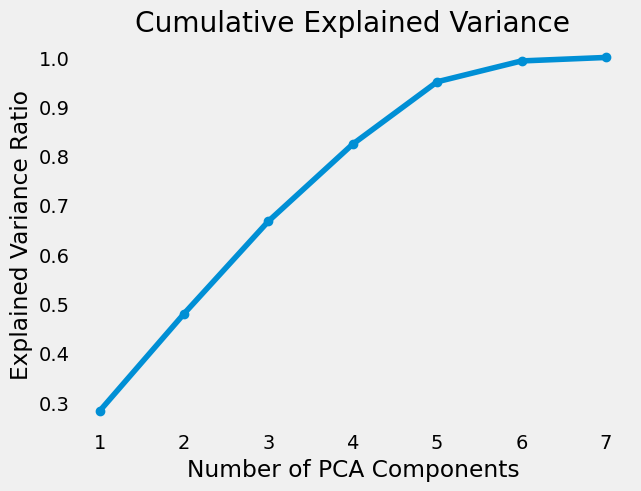

In [55]:
pca = PCA()
scaled_data_pca=pca.fit(scaled_data)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


In [45]:
silhouette = []
calinski_harabasz =[]
davies_bouldin =[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data_pca)
    sil_score = silhouette_score(scaled_data_pca, kmeans.labels_)
    silhouette.append(sil_score)
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data_pca)
    cal_score=calinski_harabasz_score(scaled_data_pca, kmeans.labels_)
    calinski_harabasz.append(cal_score)
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_data_pca)
    dav_score=davies_bouldin_score(scaled_data_pca, kmeans.labels_)
    davies_bouldin.append(dav_score)
    
print(f"Length of Silhouette List: {len(silhouette)}")
print(f"Length of Calinski-Harabasz List: {len(calinski_harabasz)}")
print(f"Length of Davies-Bouldin List: {len(davies_bouldin)}")

Length of Silhouette List: 9
Length of Calinski-Harabasz List: 9
Length of Davies-Bouldin List: 9


In [46]:
for k in range(2, 11):
    print(f"Clusters: {k}")
    print(f"Silhouette Score: {silhouette[k-2]}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz[k-2]}")
    print(f"Davies-Bouldin Index: {davies_bouldin[k-2]}")
    print("-" * 30)

Clusters: 2
Silhouette Score: 0.3924995590848138
Calinski-Harabasz Score: 727.860367843966
Davies-Bouldin Index: 1.070674264082367
------------------------------
Clusters: 3
Silhouette Score: 0.47804643795522705
Calinski-Harabasz Score: 997.2394143442125
Davies-Bouldin Index: 0.7390275528184649
------------------------------
Clusters: 4
Silhouette Score: 0.5137425248227989
Calinski-Harabasz Score: 1252.9925199463207
Davies-Bouldin Index: 0.6433556604363969
------------------------------
Clusters: 5
Silhouette Score: 0.4710014808338019
Calinski-Harabasz Score: 1362.2600452701959
Davies-Bouldin Index: 0.7089534540045808
------------------------------
Clusters: 6
Silhouette Score: 0.4676135077429991
Calinski-Harabasz Score: 1391.0210951470133
Davies-Bouldin Index: 0.6721531147988794
------------------------------
Clusters: 7
Silhouette Score: 0.4351358645556148
Calinski-Harabasz Score: 1458.4634265601107
Davies-Bouldin Index: 0.7601694916720022
------------------------------
Clusters: 8
S

In [47]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, **kmeans_set)
clusters = kmeans.fit(scaled_data_pca)

In [48]:
clusters

KMeans(n_clusters=4, n_init=10, random_state=42)

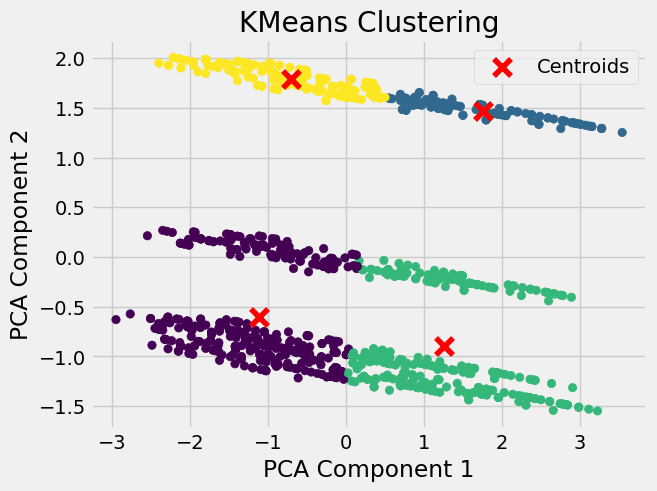

In [49]:

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, **kmeans_set)
clusters = kmeans.fit(scaled_data_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(scaled_data_pca[:, 0], scaled_data_pca[:, 1], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, c='red', label='Centroids')

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering')
plt.legend()

# Show the plot
plt.show()

# CONCLUSION 

###### Silhouette Score: Higher is better. A score closer to 1 indicates well-separated clusters.
    
###### Calinski-Harabasz Score: Higher is better. It measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion.
    
###### Davies-Bouldin Index: Lower is better. It measures the average similarity ratio of each cluster with the one it’s most similar to.

## Observations:
### Clusters = 4:

####  Highest Silhouette Score: 0.5137
####  Relatively high Calinski-Harabasz Score: 1252.99
####  Low Davies-Bouldin Index: 0.643
### This is the best balance across all metrics.


### Clusters = 3:

#### Slightly lower Silhouette Score than 4: 0.478
#### Lower Davies-Bouldin Index than 4: 0.739


### Clusters > 4:

#### The Silhouette Score starts to decrease.
#### The Calinski-Harabasz Score improves as clusters increase, but this is expected because more clusters always improve dispersion metrics.
#### The Davies-Bouldin Index fluctuates but doesn’t improve significantly.